In [17]:
import pandas as pd
import numpy as np
import helper
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
main_frame = pd.read_csv('cleaned_data/long_interpolated_target.csv', index_col=0, parse_dates=['Time'])

In [3]:
## 
# main_frame['Time'] = pd.to_datetime(main_frame['Time'])
# main_frame.head()

In [4]:
weather_frame = pd.read_csv('cleaned_data/weather.csv', index_col=0, parse_dates=['date_time'])
weather_frame.rename(columns={"date_time":"Time", "zip":"zip_code"}, inplace=True)

In [5]:
econ_frame = pd.read_csv('cleaned_data/key_econ.csv', index_col=1, parse_dates= {'Time':['Month', 'Year']})

In [6]:
# polling_frame = pd.read_csv('cleaned_data/poll_clean.csv', index_col=0, parse_dates=['date'])
# polling_frame = polling_frame.rename(columns={"zip_codes":"zip_code", "date":"Time"})


In [7]:
new_biz_frame = pd.read_csv('cleaned_data/new_biz_taxpayer.csv', index_col=1, parse_dates= {'Time':['month', 'year']})

In [8]:
main_frame.columns

Index(['Time', 'zip_code', 'zori_ssa'], dtype='object')

In [9]:
lag_ = {12:['zori_ssa']}

In [10]:
main_frame = helper.time_lag_merge(main_frame, main_frame, lag_)
main_frame = helper.time_lag_merge(main_frame, econ_frame)
main_frame = helper.time_lag_merge(main_frame, weather_frame)
main_frame = helper.time_lag_merge(main_frame, new_biz_frame)

<AxesSubplot:>

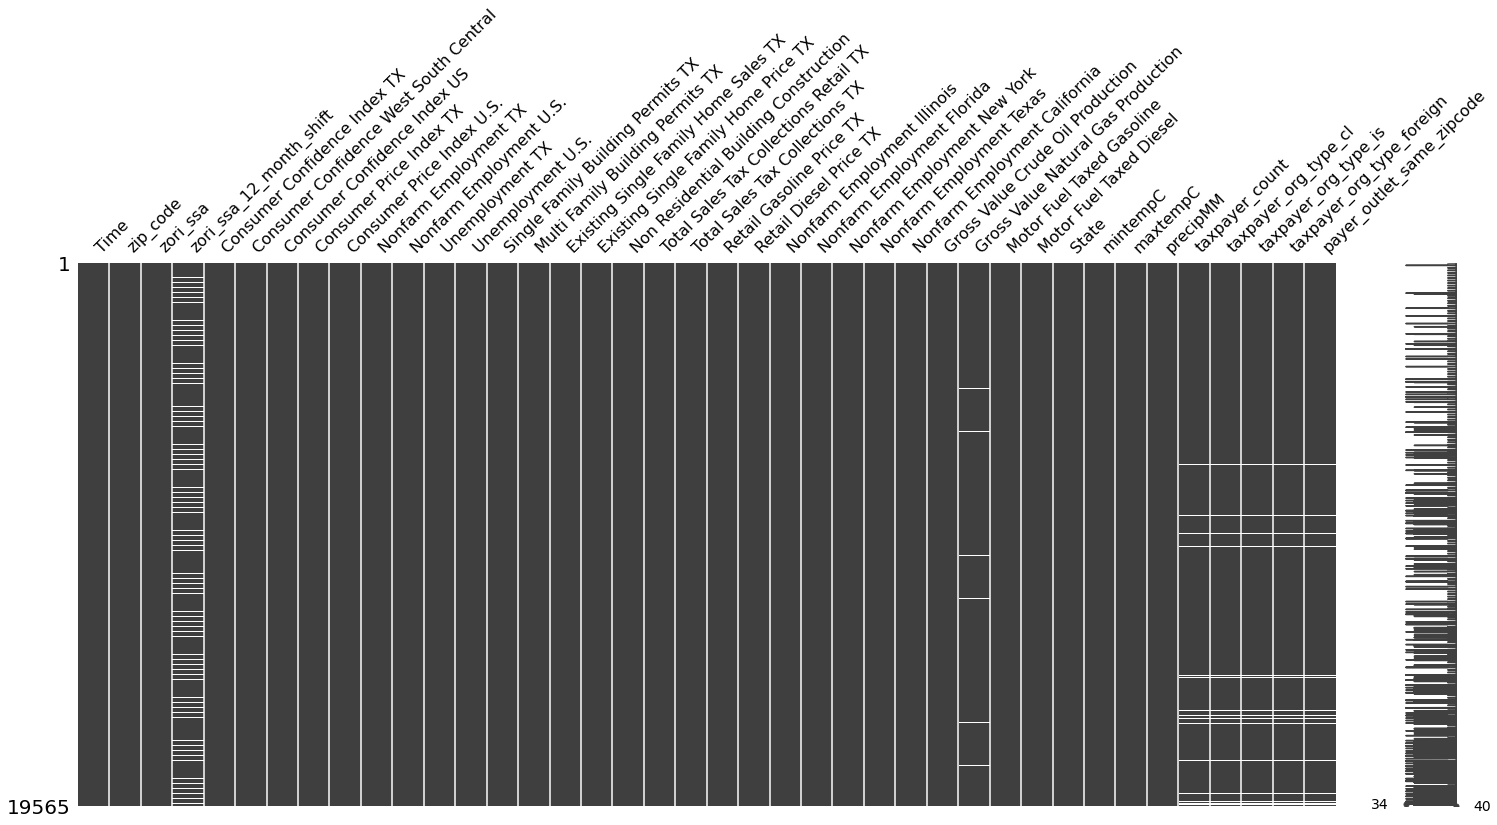

In [11]:
msno.matrix(main_frame)

In [12]:
main_frame = main_frame.fillna(0)

In [13]:
main_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19565 entries, 0 to 19564
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Time                                    19565 non-null  datetime64[ns]
 1   zip_code                                19565 non-null  int64         
 2   zori_ssa                                19565 non-null  float64       
 3   zori_ssa_12_month_shift                 19565 non-null  float64       
 4   Consumer Confidence Index TX            19565 non-null  float64       
 5   Consumer Confidence West South Central  19565 non-null  float64       
 6   Consumer Confidence Index US            19565 non-null  float64       
 7   Consumer Price Index TX                 19565 non-null  float64       
 8   Consumer Price Index U.S.               19565 non-null  float64       
 9   Nonfarm Employment TX                   19565 non-

In [14]:
y = main_frame['zori_ssa']
X = main_frame.drop(['Time', 'zori_ssa', 'zip_code', 'State'], axis=1)

In [15]:
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
lm.fit(X_train, y_train)
print(f'train_score: {lm.score(X_train, y_train)}')
print(f'test_score: {lm.score(X_test, y_test)}')

train_score: 0.7178653634058705
test_score: 0.7205394117484472


<AxesSubplot:>

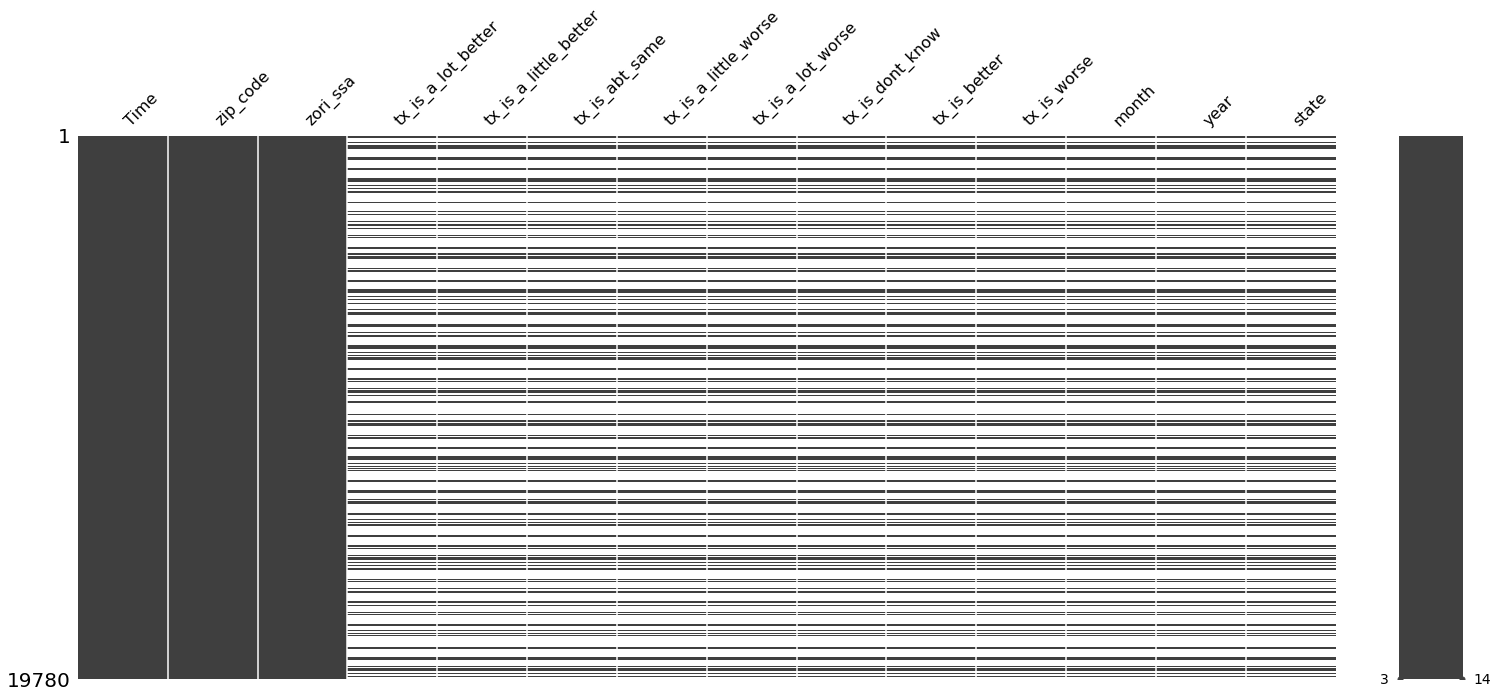

In [18]:
main_frame = pd.read_csv('cleaned_data/long_interpolated_target.csv', index_col=0, parse_dates=['Time'])
polling_frame = pd.read_csv('cleaned_data/poll_clean.csv', index_col=0, parse_dates=['date'])
polling_frame = polling_frame.rename(columns={"zip_codes":"zip_code", "date":"Time"})
main_frame = helper.time_lag_merge(main_frame, polling_frame)
msno.matrix(main_frame)

In [19]:
polling_frame.head()

,Time,tx_is_a_lot_better,tx_is_a_little_better,tx_is_abt_same,tx_is_a_little_worse,tx_is_a_lot_worse,tx_is_dont_know,tx_is_better,tx_is_worse,month,year,state,zip_code
0,2021-06-01,5.0,18.0,49.0,18.0,7.0,4.0,23.0,25.0,6,2021,TX,77494
1,2021-06-01,5.0,18.0,49.0,18.0,7.0,4.0,23.0,25.0,6,2021,TX,77449
2,2021-06-01,5.0,18.0,49.0,18.0,7.0,4.0,23.0,25.0,6,2021,TX,77084
3,2021-06-01,5.0,18.0,49.0,18.0,7.0,4.0,23.0,25.0,6,2021,TX,78130
4,2021-06-01,5.0,18.0,49.0,18.0,7.0,4.0,23.0,25.0,6,2021,TX,77573


In [20]:
polling_frame['Time'].unique()

array(['2021-06-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-02-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-02-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2012-10-01